In [1]:
import pandas as pd
from numpy.fft import fft, ifft,fftshift
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
import time
import heapq
#import PyQt5
#import PySide2
import scipy.stats as st
from fancyimpute import SoftImpute

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary

In [ ]:
#%matplotlib qt5

In [ ]:
data_range = ['00000','00300','00600','00900']
data_range1 = [300 * i + 1200 for i in range(30)]
data_range2 = ['0%d' %i for i in data_range1]
data_range3 = [300 * i + 10200 for i in range(254)]
data_range4 = ['%d' %i for i in data_range3]
[data_range.append(data_range2[i]) for i in range(len(data_range2))]
[data_range.append(data_range4[i]) for i in range(len(data_range4))]

In [ ]:
root_range = ['001-002','001-003','001-004','001-005','001-006','001-007','001-008','001-009','001-010','001-011','001-012','001-013','001-014','001-015','001-016','002-003','002-004','002-005','002-006','002-007','002-008','002-009','002-010','002-011','002-012','002-013','002-014','002-015','002-016','003-004','003-005','003-006','003-007','003-008','003-009','003-010','003-011','003-012','003-013','003-014','003-015','003-016','004-005','004-006','004-007','004-008','004-009','004-010','004-011','004-012','004-013','004-014','004-015','004-016','005-006','005-007','005-008','005-009','005-010','005-011','005-012','005-013','005-014','005-015','005-016','006-007','006-008','006-009','006-010','006-011','006-012','006-013','006-014','006-015','006-016','007-008','007-009','007-010','007-011','007-012','007-013','007-014','007-015','007-016','008-009','008-010','008-011','008-012','008-013','008-014','008-015','008-016','009-010','009-011','009-012','009-013','009-014','009-015','009-016','010-011','010-012','010-013','010-014','010-015','010-016','011-012','011-013','011-014','011-015','011-016','012-013','012-014','012-015','012-016','013-014','013-015','013-016','014-015','014-016','015-016']

In [ ]:
avg_data = []
num = 0
lag = []
for station in root_range:
    root_path = '/home/danye/1-5Hz/%s/%s_20151106' %(station,station)
    data = []
    for i in range(len(data_range)):
        data0 = pd.read_table('%s%s_ZZ.txt' %(root_path,data_range[i]),header=None)
        data.append(np.array([float(i.split()[1]) for i in data0[0][:]]))
    avg_data.append(sum(data)/len(data))
    #plt.plot(avg_data)
    max_num_index_list = map(abs(np.array(avg_data[num])).tolist().index, heapq.nlargest(10, abs(np.array(avg_data[num][1500:2500]))))
    lag.append(np.array([2000]*10) - np.array(list(max_num_index_list)))
    num = num + 1


In [ ]:
np.save("/home/danye/outcome/yellowstone_avgdata.npy",avg_data)
np.save("/home/danye/outcome/yellowstone_lagarray.npy",lag)

In [2]:
avg_data = np.load("/home/danye/outcome/yellowstone_avgdata.npy")
lag = np.load("/home/danye/outcome/yellowstone_lagarray.npy")

In [3]:
len(avg_data)

120

In [ ]:
plt.figure()
i = 0
plt.subplot(1,2,1)
plt.plot([2000, 2000], [0, -48], c='g')
for x in avg_data:
    plt.plot(x + 0.8*i,c = 'b')
    i = i - 1
    if i == -61:
        plt.subplot(1, 2, 2)
        plt.plot([2000, 2000], [-48.8, -96], c='g')

In [4]:
#plt.figure()
RSS1 = []
lag_angle1 = []
for x in avg_data:
    FFT = fft(x[1000:3001])
    angle = np.angle(FFT)
    angle_odd = [angle[2*i+1] for i in range(1000)]
    #plt.plot(np.unwrap(angle_odd))
    reg = linear_model.LinearRegression()
    #new_angle = np.unwrap(angle_odd[955:985]).reshape(-1,1)
    new_angle = np.unwrap(angle_odd[15:45])
    reg.fit(np.array([i for i in range(30)]).reshape(-1,1),new_angle)
    RSS1.append(sum([(new_angle[j] - reg.intercept_ - reg.coef_[0]*j)**2 for j in range(30)]))
    lag_angle1.append(reg.coef_[0])

lag_angle2 = []
RSS2 = []
for x in avg_data:
    FFT = fft(x[1000:3001])
    angle = np.angle(FFT)
    angle_odd = [angle[2*i+1] for i in range(1000)]
    #plt.plot(np.unwrap(angle_odd))
    reg = linear_model.LinearRegression()
    #new_angle = np.unwrap(angle_odd[955:985]).reshape(-1,1)
    new_angle = np.unwrap(angle_odd[955:985])
    reg.fit(np.array([i for i in range(30)]).reshape(-1,1),new_angle)
    RSS2.append(sum([(new_angle[j] - reg.intercept_ - reg.coef_[0]*j)**2 for j in range(30)]))
    lag_angle2.append(reg.coef_[0])

In [5]:
sxx = sum((np.array([i for i in range(30)])-np.array([14.5]*30))**2)
n = 30
T = st.t.ppf(0.95,2*n-4)
lag_angle2 = np.array(lag_angle2)
lag_angle1 = np.array(lag_angle1)
lag_angle = (lag_angle1 + lag_angle2)/2
sigma1_2 = np.array(RSS1)/(n-2)
sigma2_2 = np.array(RSS2)/(n-2)
t = abs(lag_angle1-lag_angle2)/np.sqrt(sigma1_2 + sigma2_2)*np.sqrt(sxx)

hypo_index = [t.tolist().index(t[t>T][i]) for i in range(len(t[t>T]))]

In [6]:
print(lag_angle)
for i in hypo_index:
    lag_angle[i] = 0
print(len(hypo_index))
lag_angle

[-0.02919936 -0.10244218  0.12219883  0.14409473  0.31334536  0.05205048
  0.22428689  0.06112463  0.2006901   0.1940994   0.13837197  0.14810758
  0.10745358  0.06820125  0.04044241 -0.00080909  0.01679339  0.06268658
  0.06775725 -0.65849109  0.22860329  0.04565462  0.19002084  0.16696254
  0.17422141  0.21445682  0.16391746  0.13236617  0.14268362  0.02933545
  0.04994557  0.06706872 -0.34329273  0.13436337  0.11244203  0.12196658
  0.10572983  0.36563545  0.26589431  0.22697992  0.21341831  0.20177247
  0.01442781  0.03404637 -0.4422201   0.10625418  0.04857186  0.10516821
  0.084139    0.09268652  0.27086297  0.24229568  0.22897163  0.21593694
  0.00959853 -0.01447531  0.05849501  0.06592366  0.06604111  0.04727638
 -0.05421485 -0.05794442 -0.08552834 -0.0984532  -0.11323824  0.1439035
  0.04477266  0.04810396  0.05839492  0.04940455 -0.06093986 -0.0678215
 -0.0941639  -0.10491342 -0.1190626  -0.28844524 -0.03859023 -0.22336359
 -0.42916415 -0.09109242  0.14827827 -0.30582761  0.2

array([-0.02919936, -0.10244218,  0.12219883,  0.14409473,  0.        ,
        0.        ,  0.22428689,  0.        ,  0.2006901 ,  0.1940994 ,
        0.13837197,  0.14810758,  0.10745358,  0.06820125,  0.04044241,
       -0.00080909,  0.01679339,  0.06268658,  0.06775725, -0.65849109,
        0.22860329,  0.        ,  0.19002084,  0.16696254,  0.17422141,
        0.21445682,  0.16391746,  0.13236617,  0.14268362,  0.02933545,
        0.04994557,  0.06706872,  0.        ,  0.13436337,  0.        ,
        0.12196658,  0.10572983,  0.        ,  0.26589431,  0.22697992,
        0.21341831,  0.20177247,  0.01442781,  0.03404637,  0.        ,
        0.10625418,  0.        ,  0.10516821,  0.        ,  0.        ,
        0.27086297,  0.24229568,  0.22897163,  0.21593694,  0.        ,
        0.        ,  0.05849501,  0.06592366,  0.06604111,  0.04727638,
       -0.05421485, -0.05794442, -0.08552834, -0.0984532 , -0.11323824,
        0.        ,  0.04477266,  0.04810396,  0.05839492,  0.04

In [7]:
mat = np.zeros((16,16))

for i in range(15):
    for j in range(15-i):
        if i < (j + i + 1) :
            mat[i,j + i + 1] = lag_angle[int(j + i * (31 - i)/2)]
            
for i in range(16):
    for j in range(16):
        if i < j:
            mat[j,i] = -mat[i,j]
mat

array([[ 0.        , -0.02919936, -0.10244218,  0.12219883,  0.14409473,
         0.        ,  0.        ,  0.22428689,  0.        ,  0.2006901 ,
         0.1940994 ,  0.13837197,  0.14810758,  0.10745358,  0.06820125,
         0.04044241],
       [ 0.02919936,  0.        , -0.00080909,  0.01679339,  0.06268658,
         0.06775725, -0.65849109,  0.22860329,  0.        ,  0.19002084,
         0.16696254,  0.17422141,  0.21445682,  0.16391746,  0.13236617,
         0.14268362],
       [ 0.10244218,  0.00080909,  0.        ,  0.02933545,  0.04994557,
         0.06706872,  0.        ,  0.13436337,  0.        ,  0.12196658,
         0.10572983,  0.        ,  0.26589431,  0.22697992,  0.21341831,
         0.20177247],
       [-0.12219883, -0.01679339, -0.02933545,  0.        ,  0.01442781,
         0.03404637,  0.        ,  0.10625418,  0.        ,  0.10516821,
         0.        ,  0.        ,  0.27086297,  0.24229568,  0.22897163,
         0.21593694],
       [-0.14409473, -0.06268658, -0

In [17]:
X = np.array([[np.exp(mat[i][j]) for j in range(len(mat[i]))] for i in range(len(mat))])
X_incomplete = X.copy()
for i in range(16):
    for j in range(16):
        if X[i,j] == 1 and i != j:
            X_incomplete[i,j] = np.nan
k = np.sum(np.isnan(X_incomplete))
missing_mask = np.isnan(X_incomplete)
print(k)

50


In [185]:
#print(X_incomplete)
X_incomplete1 = np.delete(X_incomplete,6,axis=1)
#print(X_incomplete1)
X_incomplete2 = np.delete(X_incomplete1,6,axis=0)
#print(X_incomplete2)
X1 = np.delete(X,6,axis = 1)
X2 = np.delete(X1,6,axis = 0)
print(X2)
missing_mask1 = np.delete(missing_mask,6,axis = 1)
missing_mask2 = np.delete(missing_mask1,6,axis = 0)
softimpute = SoftImpute(init_fill_method = 'mean',verbose=True,shrinkage_value=0.03,convergence_threshold=0.001)
X_filled = softimpute.complete(X_incomplete2)
print(np.log(X_incomplete2)*5/np.pi)
print(np.log(X_filled)*5/np.pi)
print(np.log(X_filled)*5/np.pi-np.log(X2)*5/np.pi)
X_filled1 = np.log(X_filled)*5/np.pi
newfilled = abs(X_filled1-np.log(X2)*5/np.pi)
newfilled1 = newfilled/2 + np.transpose(newfilled/2)
print(newfilled1)

[[1.         0.97122282 0.90263034 1.12997875 1.15499351 1.
  1.25142999 1.         1.22224594 1.21421697 1.14840265 1.15963764
  1.11343917 1.07058074 1.04127134]
 [1.02962984 1.         0.99919124 1.0169352  1.06469309 1.0701055
  1.25684333 1.         1.2092748  1.18171    1.19031908 1.23918862
  1.17811707 1.14152624 1.15336484]
 [1.10787324 1.00080941 1.         1.02976997 1.05121388 1.06936897
  1.14380837 1.         1.12971634 1.11152154 1.         1.30459717
  1.25480467 1.23790237 1.22356958]
 [0.8849724  0.98334683 0.97109066 1.         1.0145324  1.03463258
  1.11210451 1.         1.11089745 1.         1.         1.3110954
  1.27417089 1.25730637 1.24102412]
 [0.86580573 0.9392378  0.9512812  0.98567577 1.         1.
  1.0602397  1.06814517 1.06827064 1.04841173 0.94722857 0.9437024
  0.91802713 0.90623811 0.8929379 ]
 [1.         0.9344873  0.93513093 0.96652668 1.         1.
  1.04579009 1.04927973 1.06013358 1.05064531 0.94087982 0.93442726
  0.91013358 0.90040247 0.88775

In [188]:
#print(X_filled)
X_filled2 = X_filled1.copy()
X_filled2[missing_mask2] = newfilled1[missing_mask2]
print(X_filled2[missing_mask2])
X_filled3 = X_filled2.copy()
X_filled3[5,0] = -X_filled2[5,0]
X_filled3[5,4] = -X_filled2[5,4]
X_filled3[7,0] = -X_filled2[7,0]
X_filled3[7,1] = -X_filled2[7,1]
X_filled3[7,2] = -X_filled2[7,2]
X_filled3[7,3] = -X_filled2[7,3]
X_filled3[7,9] = -X_filled2[7,9]
X_filled3[7,13] = -X_filled2[7,13]
X_filled3[7,14] = -X_filled2[7,14]
X_filled3[9,3] = -X_filled2[9,3]
X_filled3[9,6] = -X_filled2[9,6]
X_filled3[10,2] = -X_filled2[10,2]
X_filled3[10,3] = -X_filled2[10,3]
print(X_filled3)

[0.23427643 0.31878534 0.29385372 0.26286329 0.26588999 0.21830267
 0.18491184 0.19921051 0.01463906 0.23427643 0.01463906 0.00778419
 0.31878534 0.29385372 0.26286329 0.21830267 0.00913572 0.23005998
 0.25529422 0.18491184 0.00778419 0.00913572 0.26588999 0.19921051
 0.23005998 0.25529422]
[[ 0.         -0.04647223 -0.1630418   0.19448547  0.22933388  0.23427643
   0.35696367  0.31878534  0.31940821  0.3089188   0.22022583  0.23572053
   0.17101768  0.10854566  0.0643661 ]
 [ 0.04647223  0.         -0.0012877   0.02672752  0.09976879  0.10783901
   0.36383343  0.29385372  0.30242756  0.26572914  0.27728198  0.34131864
   0.26088274  0.21066731  0.22708804]
 [ 0.1630418   0.0012877   0.          0.04668881  0.07949085  0.10674319
   0.21384594  0.26286329  0.19411584  0.16827425  0.26588999  0.42318394
   0.36124976  0.33966579  0.32113086]
 [-0.19448547 -0.02672752 -0.04668881  0.          0.02296258  0.05418649
   0.16910878  0.21830267  0.1673804   0.18491184  0.19921051  0.43109181

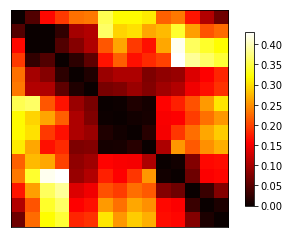

In [200]:
plt.imshow(abs(X_filled3),cmap = 'hot')
plt.xticks([])
plt.yticks([])
plt.colorbar(shrink=0.8)
plt.savefig('/home/danye/outcome/hotfilled.png')

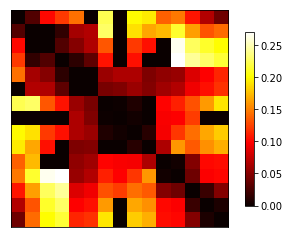

In [201]:
plt.imshow(abs(np.log(X2)),cmap = 'hot')
plt.xticks([])
plt.yticks([])
plt.colorbar(shrink=0.8)
plt.savefig('/home/danye/outcome/hotincomplete.png')

[14.9795374   0.56625405  0.56625405  0.15582208  0.15582208  0.08197944
  0.08197944  0.05574526  0.05574526  0.02526207]


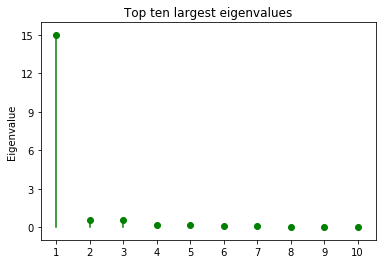

In [192]:
evals = abs(np.linalg.eigvals(X_filled))
sorted_indices = np.argsort(evals)
k = 10
topk_evecs = evals[sorted_indices[:-k-1:-1]]
print(topk_evecs)
point = [i for i in range(10)]
for i in range(10):
    plt.plot([point[i],point[i]],[0,topk_evecs[i]],c = 'g')
    plt.scatter(point[i],topk_evecs[i],c = 'g')
plt.ylabel('Eigenvalue')
plt.title('Top ten largest eigenvalues')
plt.yticks([3*i for i in range(6)])
plt.xticks([i for i in range(10)],[1 + i  for i in range(10)])
plt.savefig('/home/danye/outcome/impute_0.95.png')

In [ ]:
print(X)
print(X_filled)
print(X_filled[0:5,0:5])
plt.imshow(X_filled)
plt.colorbar(shrink=0.8)

In [ ]:
plt.figure()
i = 0
plt.subplot(1,2,1)
for k in hypo_index:
    plt.plot(avg_data[k] + 0.8*i,c = 'b')
    i = i - 1

good_index = [i for i in range(120)]
for k in hypo_index:
    good_index.remove(k)

plt.figure()
plt.subplot(1, 2, 2)
i = 0
for k in good_index:
    plt.plot(avg_data[k] + 0.8*i,c = 'b')
    i = i - 1
    if k == 48:
        break

plt.subplot(1, 2, 1)
for k in good_index[60:90]:
    plt.plot(avg_data[k] + 0.8 * i, c='b')
    i = i-1
